# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.


## Instructions

- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 


Name: Aum Alok Khatlawala <br>
Roll Number: 2020113008

In [ ]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [5]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [6]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [7]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [8]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


[657 137 308   2 177 409]


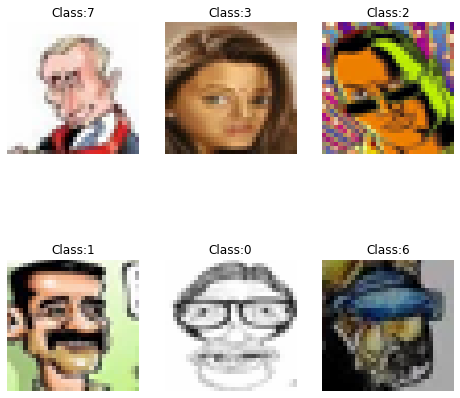

In [9]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
ind = np.random.randint(0,y.shape[0],6)
print(ind)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [98]:
# converting each image into a one dimension flattened image

def eigen_finder(images):
    one_d_images_list = []
    for image in images:
        tba = np.reshape(image, H*W*C)
        one_d_images_list.append(tba)
    one_d_images_list = np.array(one_d_images_list)
    # calculating the mean flattened image
    mean_one_d_image = np.mean(one_d_images_list, axis=0)
        # plt.imshow(np.array(mean_one_d_image).reshape(H, W, C))
    # calculating the normalised one dimensional image
    normalised_one_d_images_list = one_d_images_list - mean_one_d_image
#     print(len(normalised_one_d_images_list))
        # plt.imshow(np.array(normalised_one_d_images_list[0]).reshape(H, W, C))
    # calculating the eigen values and eigen vectors
    covariance = np.dot(normalised_one_d_images_list, normalised_one_d_images_list.T)
    covariance = covariance / len(normalised_one_d_images_list)
    eigen_vals, eigen_vectors = np.linalg.eigh(covariance)
    
    eigen_faces = np.dot(normalised_one_d_images_list.T, eigen_vectors)
    # sorting the eigenvalues in descending order
    # since eigen_vals is already in ascending order, we reverse it
    idx = np.argsort(eigen_vals)
    idx = idx[::-1]
    eigen_vals = eigen_vals[::-1]
    eigen_faces = eigen_faces[:, idx]
    # normalising the eigen faces
    for i in range(eigen_faces.shape[1]):
        eigen_faces[:, i] /= np.linalg.norm(eigen_faces[:, i])
    return eigen_vals, eigen_vectors, eigen_faces, mean_one_d_image, normalised_one_d_images_list, one_d_images_list

#### Compute eigen values and plot eigen value spectrum

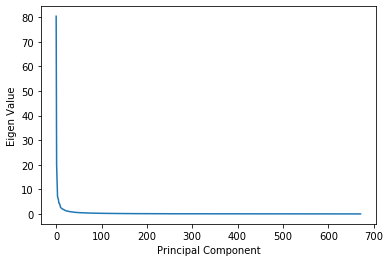

In [99]:
# eigen values and spectrum
eigen_values_spectrum, eigen_vectors, eigen_faces, mean_image, normalised_images, one_d_images_list = eigen_finder(X)
# since the eigen values are already sorted in descending order, we just plot them
plt.plot(eigen_values_spectrum)
plt.xlabel("Principal Component")
plt.ylabel("Eigen Value")
plt.show()
# print(len(normalised_images))

#### Plot the percentage of variances vs the number of principal components

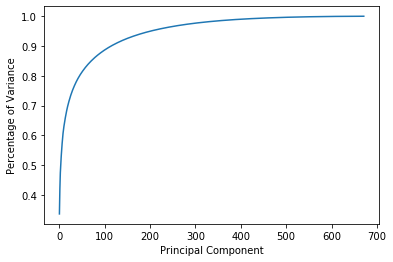

In [12]:
# plot variance vs components
plt.plot(np.cumsum(eigen_values_spectrum) / np.sum(eigen_values_spectrum))
plt.xlabel("Principal Component")
plt.ylabel("Percentage of Variance")
plt.show()

#### Visualize eigen faces(eigen vectors)

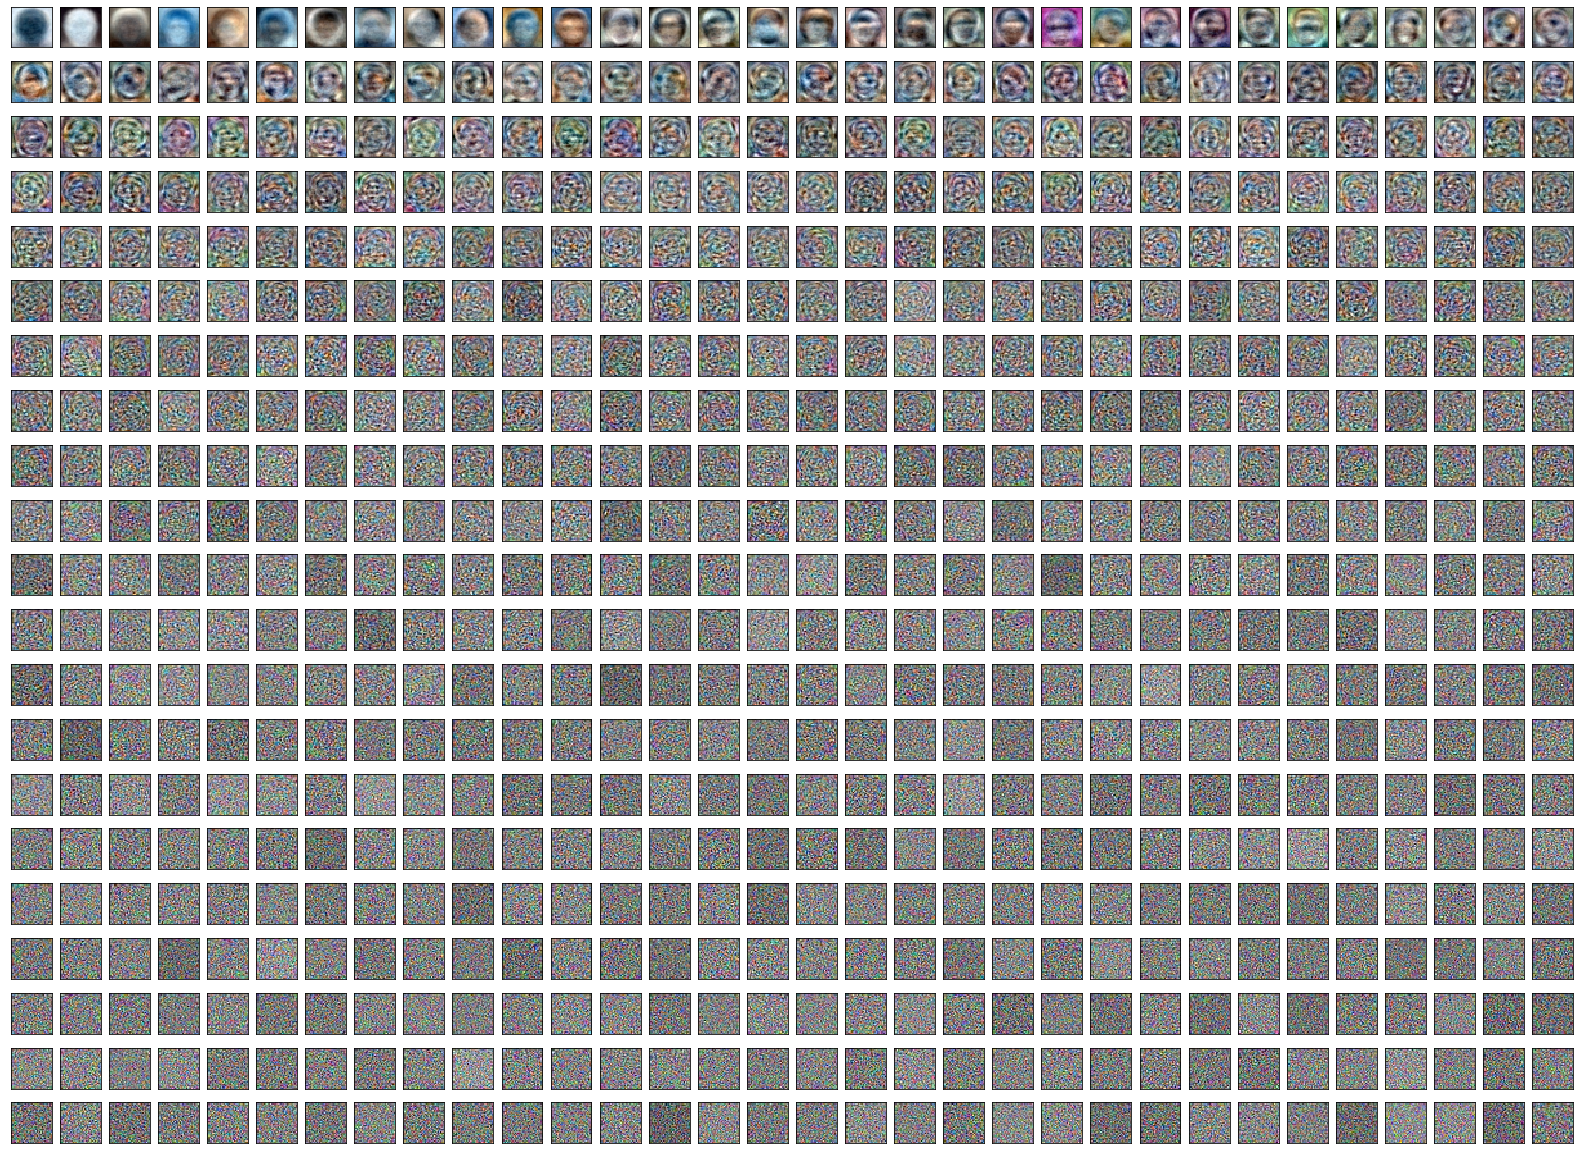

In [21]:
def plot_eigen_faces(eigenfaces):
    fig, axes = plt.subplots(21, 32, figsize=(28, 21), subplot_kw={"xticks":[], "yticks":[]})
    for i, ax in enumerate(axes.flat):
        image = np.array(eigenfaces[:, i])
        image = image.reshape(H, W, C)
        image -= np.min(image)
        image /= np.max(image)
        ax.imshow(image)

plot_eigen_faces(eigen_faces)

#### Reconstruction 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


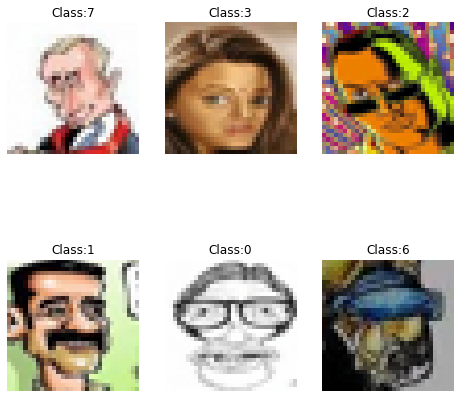

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


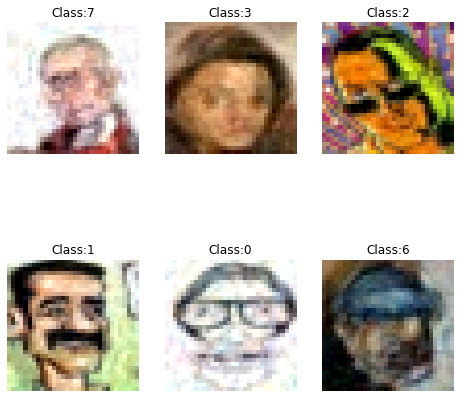

In [14]:
# reconstruction
def reconstruct(normalised_images, k):
    top_k_eigen_faces = eigen_faces[:, :k]
    # project the images onto the eigen faces
    proj_images = np.dot(normalised_images, top_k_eigen_faces)
    reconstructed_images = np.dot(proj_images, top_k_eigen_faces.T) + mean_image
    reconstructed_images = np.array(reconstructed_images).reshape(N, H, W, C)
    return reconstructed_images
display_images(reconstruct(normalised_images, 672)[ind,...], y[ind], row = 2, col = 3)
display_images(reconstruct(normalised_images, 200)[ind,...], y[ind], row = 2, col = 3)

The "ghost faces" shown above help in showing the images using lesser principal components. These are useful in helping models classify the data using lesser amount of information about the images. This is immensely useful in reducing the space complexity required for such models.

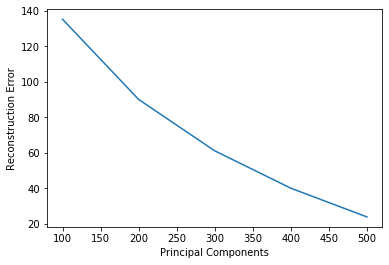

In [15]:
principal_components = [100, 200, 300, 400, 500]
recon_errors = []
for k in principal_components:
    reconstructed_images = reconstruct(normalised_images, k)
    recon_image_in_one_d_list = []
    for image in reconstructed_images:
        recon_image_in_one_d = np.reshape(image, H*W*C)
        recon_image_in_one_d_list.append(recon_image_in_one_d)
    recon_image_in_one_d_list = np.array(recon_image_in_one_d_list)
    # error = frobenius norm of difference between original and reconstructed image
    recon_error = np.linalg.norm(one_d_images_list - recon_image_in_one_d_list, 'fro')
    recon_errors.append(recon_error)

plt.plot(principal_components, recon_errors)
plt.xlabel("Principal Components")
plt.ylabel("Reconstruction Error")
plt.show()

#### Plot data in 2D

(672, 3072)


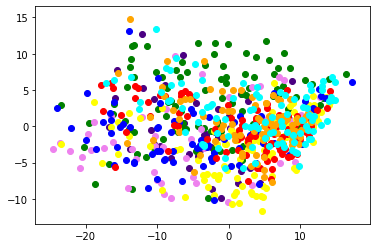

In [105]:
# plot data in 2D
# taking first 2 eigen faces
first_2_eigen_faces = eigen_faces[:, :2]
colors = ["violet", "indigo", "blue", "green", "yellow", "orange", "red", "cyan"]
print(normalised_images.shape)
for i in range(N):
    plt.scatter(np.dot(normalised_images[i], first_2_eigen_faces[:, 0]), np.dot(normalised_images[i],
                    first_2_eigen_faces[:, 1]), color = colors[y[i]])

There is no clustering observed since most data points lie in the same region. This happens because the dominant features are common to both classes for the most part. The outlier points signify special features that help in differentiating that class very easily with respect to other classes.

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [47]:
# Load data again
X,y = load_data(dirpath)
# print(y)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

Amitabhbachan


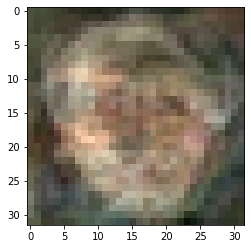

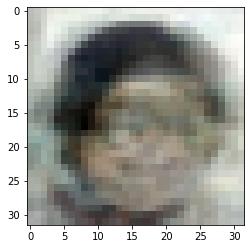

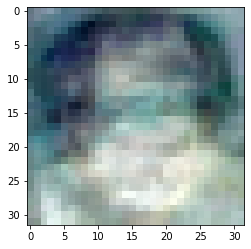

AamirKhan


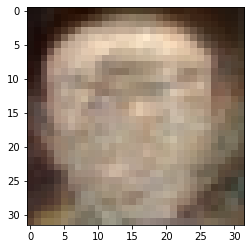

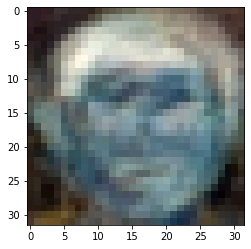

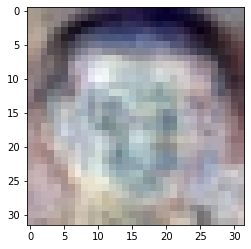

DwayneJohnson


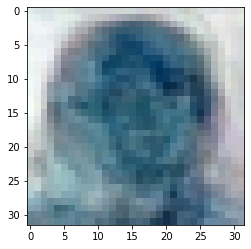

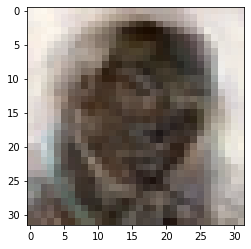

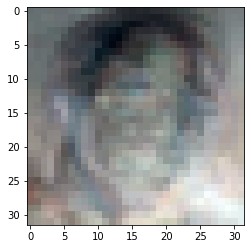

AishwaryaRai


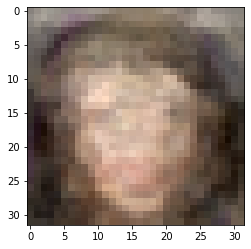

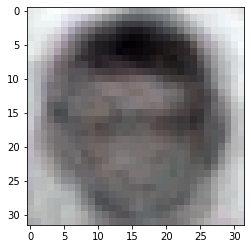

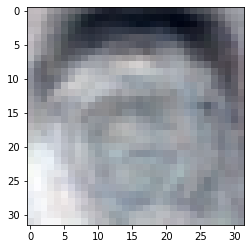

BarackObama


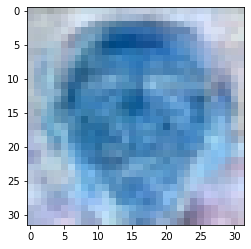

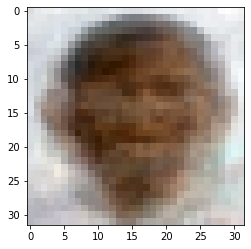

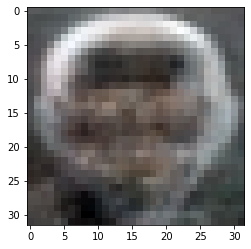

NarendraModi


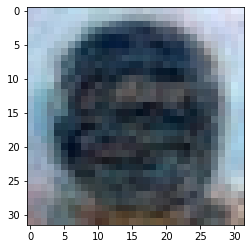

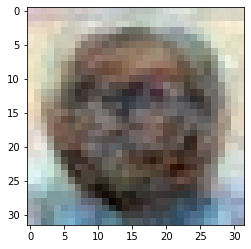

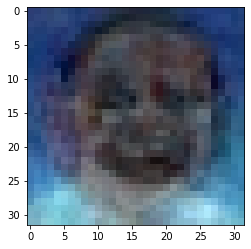

ManmohanSingh


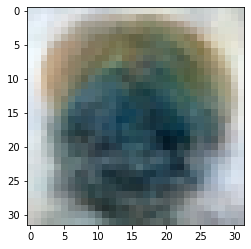

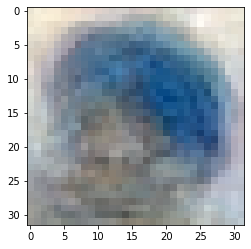

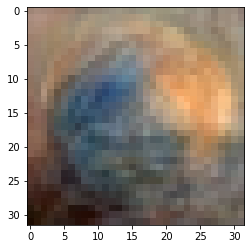

VladimirPutin


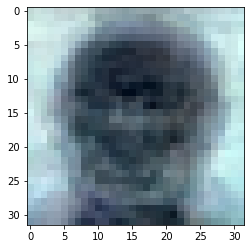

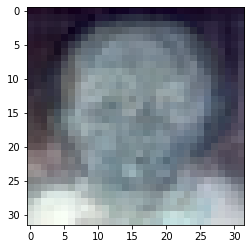

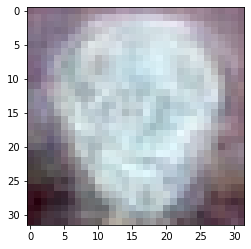

In [68]:
# visualize
for i in range(len(cfw_dict)):
    print(list(cfw_dict.keys())[i])
    X_i = X[y == i]
    eigen_values, eigen_vectors, eigen_faces, mean_image, normalised_images, one_d_images_list = eigen_finder(X_i)
    dominant_eigen_faces = eigen_faces[:, :3]
    for j in range(3):
        eigen_face = np.array(dominant_eigen_faces)[:, j]
        eigen_face = eigen_face.reshape(H, W, C)
        eigen_face -= np.min(eigen_face)
        eigen_face /= np.max(eigen_face)
        plt.imshow(eigen_face)
        plt.show()

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [59]:
# components required
eigen_values, eigen_vectors, eigen_faces, mean_image, normalised_images, one_d_images_list = eigen_finder(X)
variance_percentage = np.cumsum(eigen_values) / np.sum(eigen_values)
print("Entire Dataset :", np.where(variance_percentage > 0.9)[0][0])

for i in range(len(cfw_dict)):
    X_i = X[y==i]
#     print(X_i)
    eigen_values, eigen_vectors, eigen_faces, mean_image, normalised_images, one_d_images_list = eigen_finder(X_i)
    variance_percentage = np.cumsum(eigen_values) / np.sum(eigen_values)
    print(list(cfw_dict.keys())[i], ":", np.where(variance_percentage > 0.9)[0][0])

Entire Dataset : 114
Amitabhbachan : 20
AamirKhan : 23
DwayneJohnson : 27
AishwaryaRai : 35
BarackObama : 42
NarendraModi : 56
ManmohanSingh : 49
VladimirPutin : 43


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

No, the number of components are not the same for the entire dataset and each of the classes. This is clearly observed from the output above. This evidently occurs due to the variance in features for each class. Each class has different number of components required to capture the same variance.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [69]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [74]:
# code here
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

one_d_images_list = []
for image in X:
    tba = np.reshape(image, H*W*C)
    one_d_images_list.append(tba)
one_d_images_list = np.array(one_d_images_list)
# calculating the mean flattened image
mean_one_d_image = np.mean(one_d_images_list, axis=0)
# calculating the normalised one dimensional image
X = np.array(one_d_images_list - mean_one_d_image)
print(X.shape)
scores = []
for i in range(1, 201):
    pca = PCA(n_components = i)
    pca.fit(X)
    x_pca = pca.transform(X)
    lr = LinearRegression()
    lr.fit(x_pca, label)
    print(lr.score(x_pca, label))
    scores.append(lr.score(x_pca, label))

(672, 3072)
0.7629115485389928
0.7708201851860956
0.7793215197715233
0.7812182602133397
0.7851571543838738
0.7922765174134314
0.8016671389841337
0.8016587459547522
0.8229823677936963
0.8343636589521224
0.8381777751109837
0.8439324037365545
0.8468566793993919
0.8611004448750916
0.8622714784878432
0.8636635701284554
0.8696956350141487
0.8698751838827536
0.8710205034269387
0.8788630561528255
0.8798557719838235
0.8799651227562949
0.8801920902367637
0.8846160476147131
0.884373236226978
0.8873335963634632
0.8884269020947753
0.889275263237963
0.8895673629852777
0.8945080532090532
0.8992379241313497
0.9019004617735294
0.9076720836154382
0.9113979458422353
0.9114560415729087
0.910961986914429
0.9119790269658185
0.9126327488750439
0.9128367595443411
0.9132121796929207
0.9150353334162357
0.9179007040952883
0.9187076750278313
0.9180285530275771
0.9181729670268324
0.9185883095373003
0.9185492489713302
0.9256310123061324
0.9247721179613027
0.9280825532582668
0.9274576160231739
0.9286420172393701
0.9

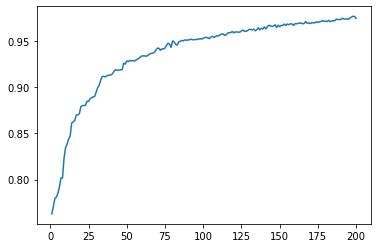

In [75]:
# analysis / plot (split the cells if required)
plt.plot(range(1, 201), scores)

We observe how linear regression fits with the amount of features used in PCA. The curve is like a log function and this means that there is very less principal component increase required to increase the classification and performance. As the number of components increase, the regression performs better. But, as expected, the computation space and time also increases. We can easily hypothesise that the score reaches 1 when number of components is equal to 672 (all principal components are present).